In [1]:
%matplotlib inline

import numpy as np
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.rcParams['font.family'] = 'Myriad Pro'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

lyx0 = np.loadtxt('var_comp_lyx0.txt', delimiter=',')
lyx1 = np.loadtxt('var_comp_lyx1.txt', delimiter=',')
ljx0 = np.loadtxt('var_comp_ljx0.txt', delimiter=',')
ljx1 = np.loadtxt('var_comp_ljx1.txt', delimiter=',')
all_var = [lyx0, lyx1, ljx0, ljx1]

colors = ['#e31a1c','#fb9a99','#ff7f00','#6a3d9a','#1f78b4','#ff7f00','#33a02c']

In [2]:
def var_comp_est(Var_):
    re = np.zeros((5, 36))
    for i in range(36):
        tmp_var = Var_[:, 5*i:5*(i+1)]
        re[0, i] = tmp_var[0, 0]
        re[1, i] = tmp_var[1, 1]
        re[2, i] = tmp_var[3, 3]
        re[3, i] = tmp_var[4, 4]
        tot_var = np.sum(tmp_var)
        re[4, i] = tot_var - re[0, i] - re[1, i] - re[2, i] - re[3, i]
    return re

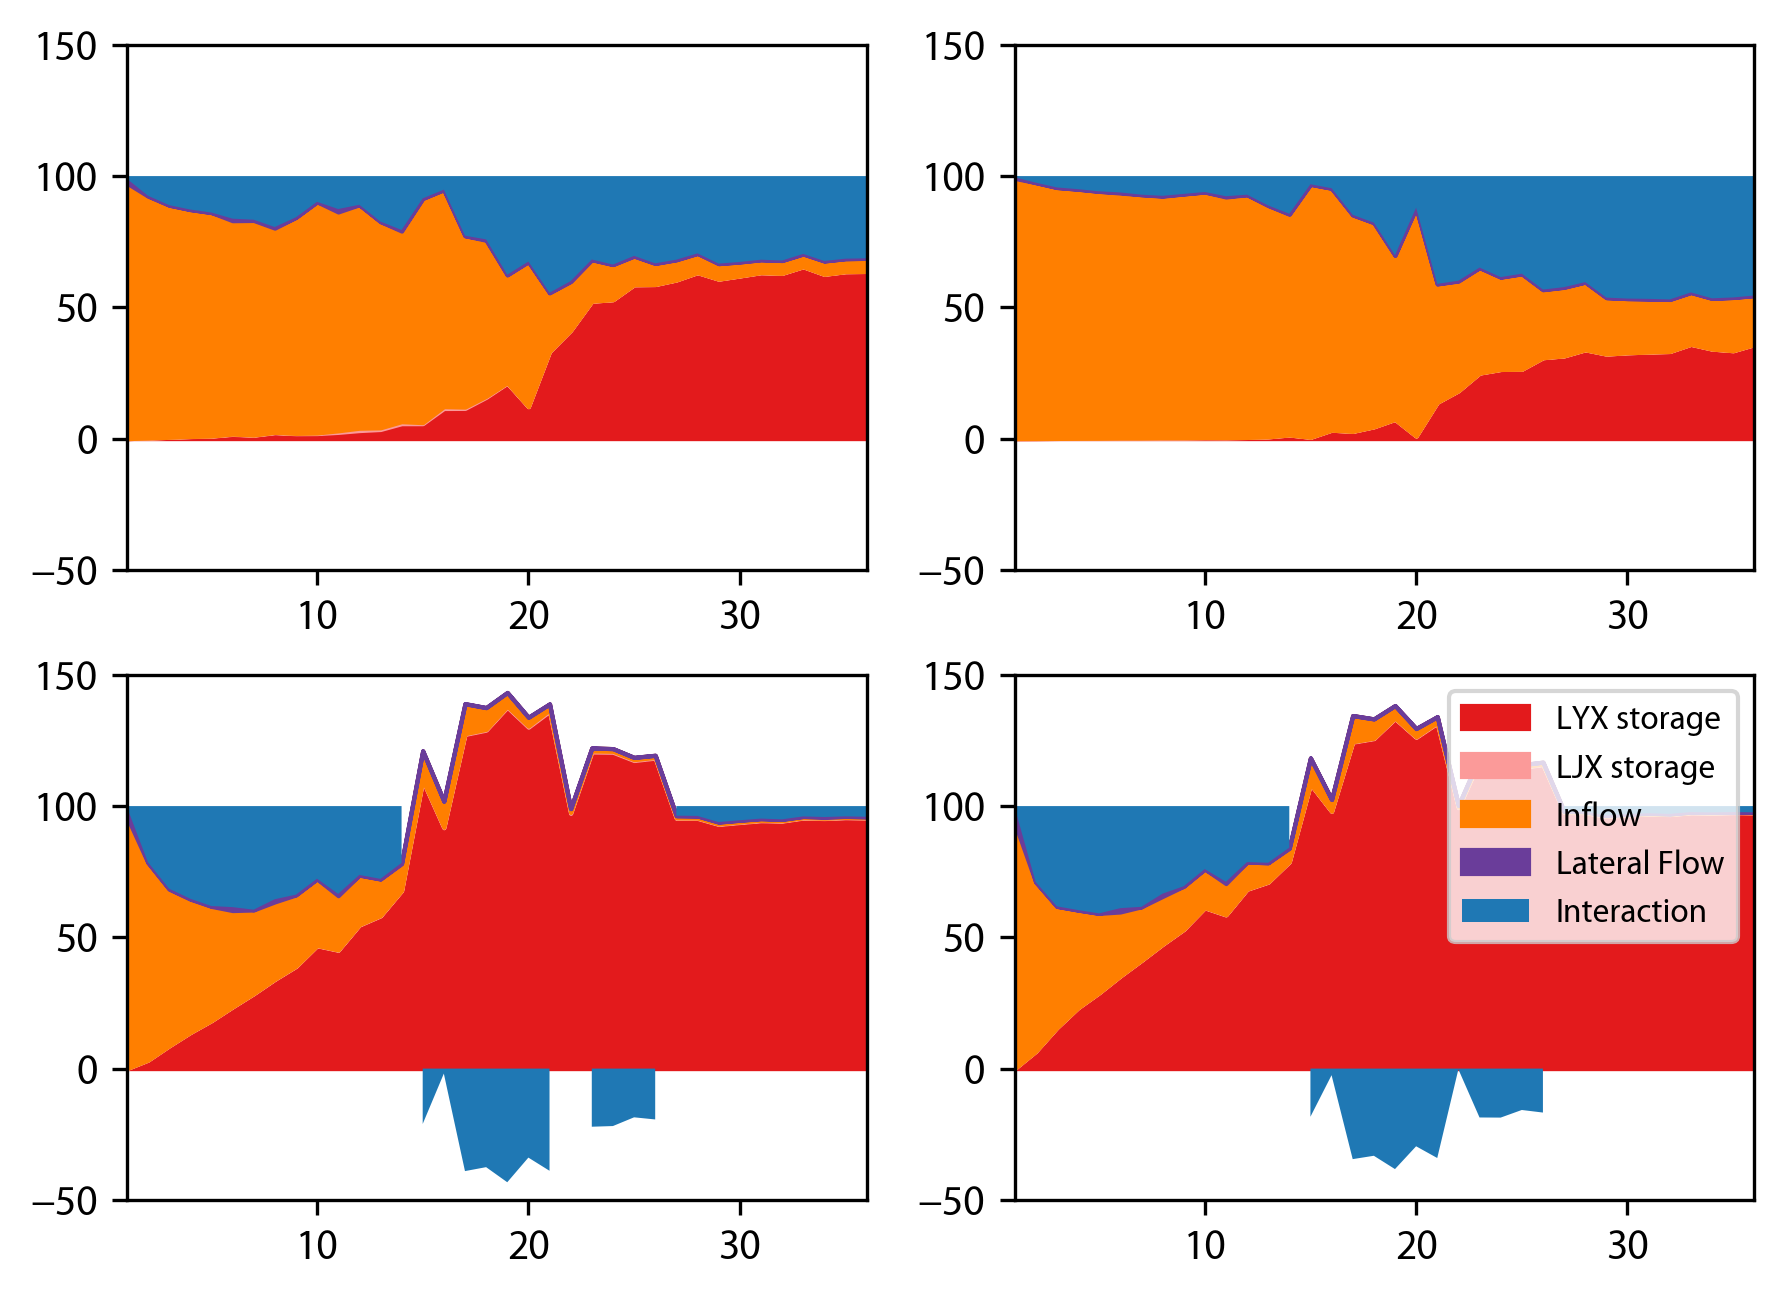

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(7, 5))

label_str = ['LYX storage', 'LJX storage', 'Inflow', 'Lateral Flow', 'Interaction']
for i in range(2):
    for j in range(2):
        var_comp = var_comp_est(all_var[2*j + i])
        rescale = np.sum(var_comp, axis=0) / 100
        y1 = np.zeros(36)
        for k in range(4):
            y2 = y1 + var_comp[k, :]/rescale
            ax[i, j].fill_between(range(1, 37), y1, y2, color=colors[k], label = label_str[k])
            y1 = y2 
        inter_var = var_comp[4, :]/rescale

        ax[i, j].fill_between(range(1, 37), y1, y1 + inter_var, where=inter_var>0, color=colors[4], edgecolor='None', label = label_str[4])
        ax[i, j].fill_between(range(1, 37), inter_var, 0, where=inter_var<0, color=colors[4], edgecolor='None')
        ax[i, j].set_ylim([-50, 150])
        ax[i, j].set_xlim([1, 36])
ax[i, j].legend(loc='upper right', fontsize=8)

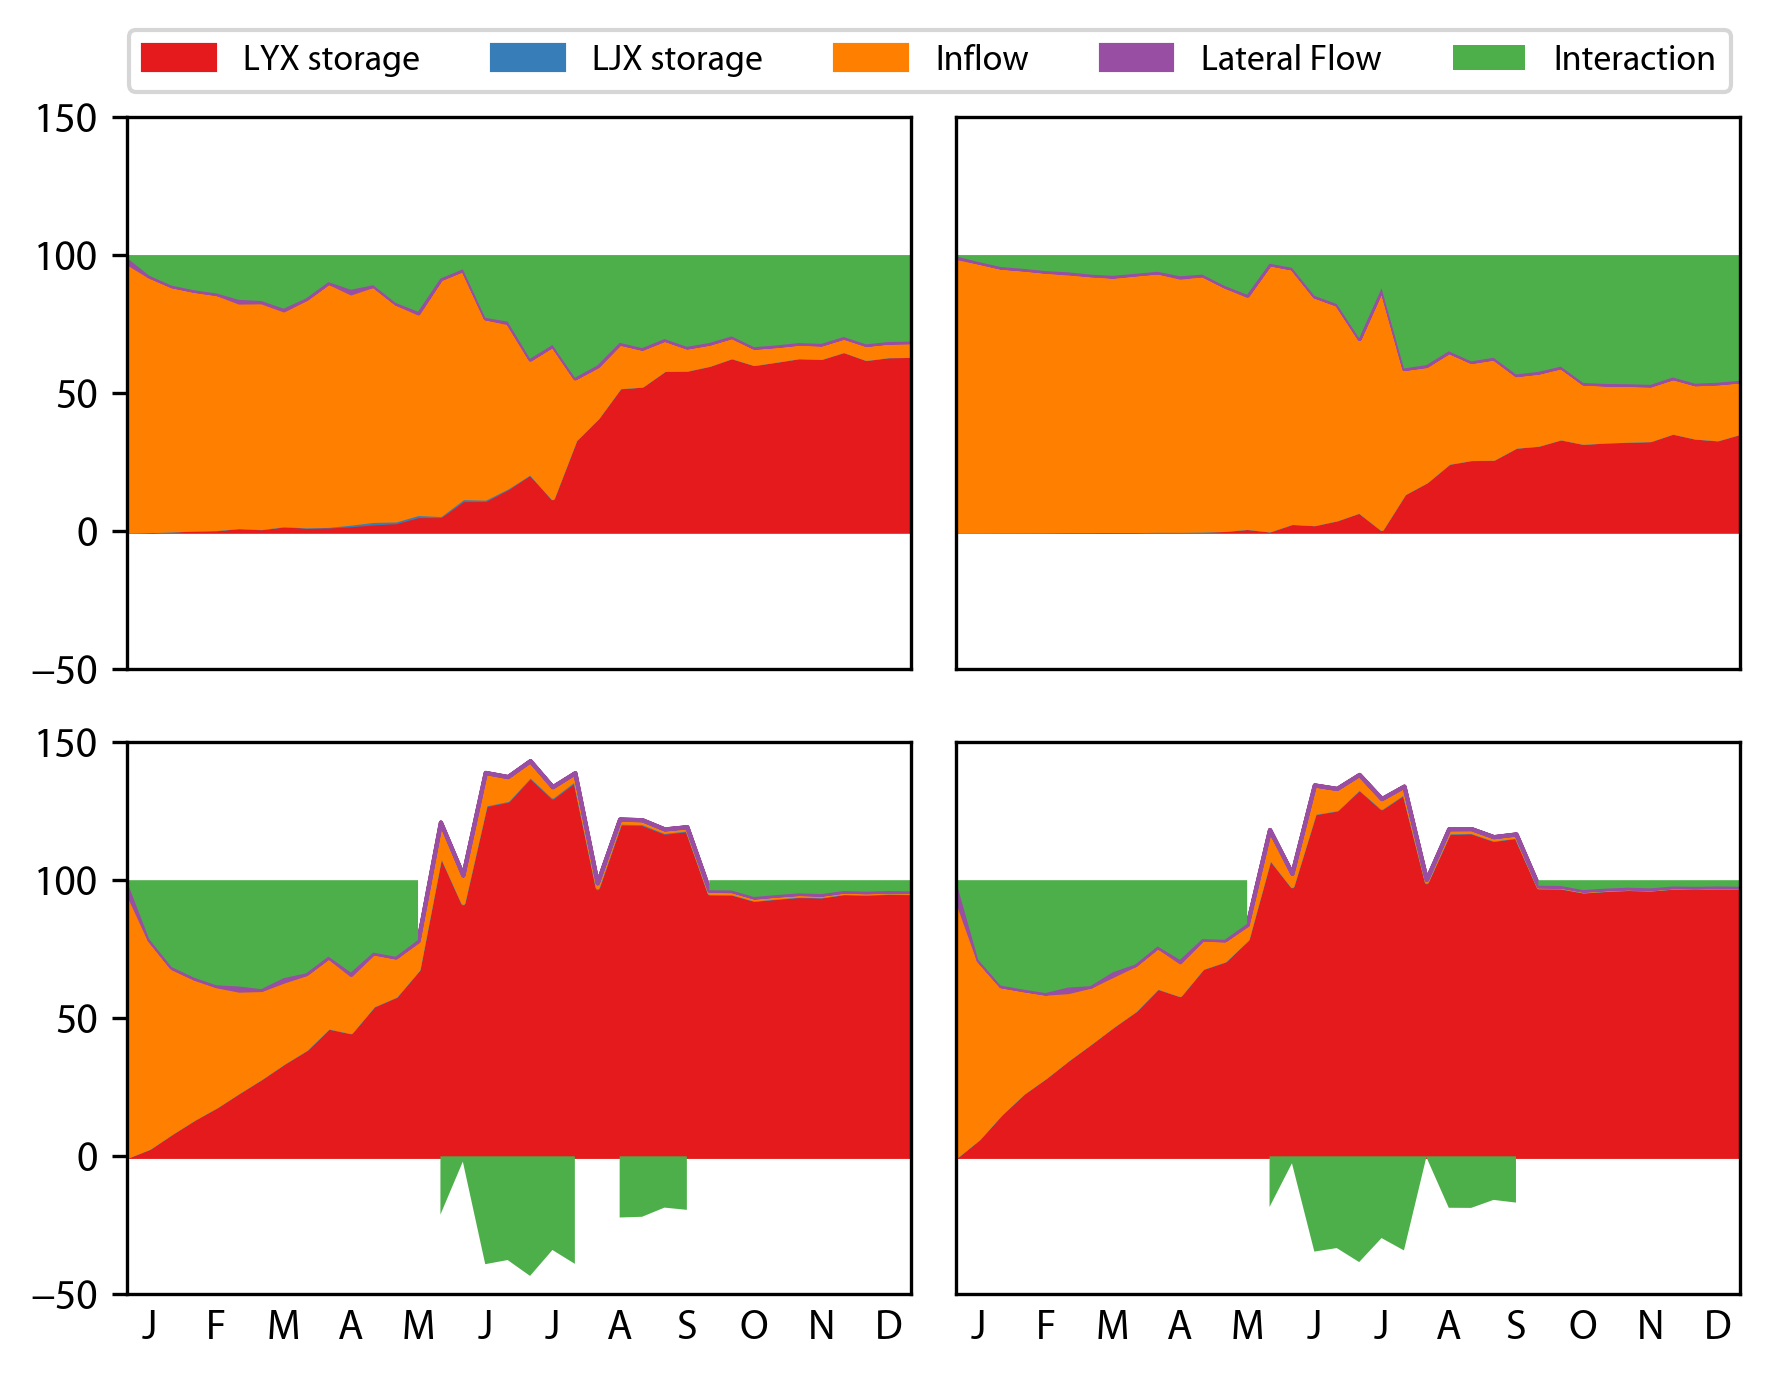

In [37]:
fig, ax = plt.subplots(2, 2, figsize=(6, 5))

label_str = ['LYX storage', 'LJX storage', 'Inflow', 'Lateral Flow', 'Interaction']
month_str = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']
colors = ['#e41a1c', '#377eb8', '#ff7f00', '#984ea3', '#4daf4a']

# Loop through the subplots
for i in range(2):
    for j in range(2):
        var_comp = var_comp_est(all_var[2*j + i])
        rescale = np.sum(var_comp, axis=0) / 100
        y1 = np.zeros(36)
        for k in range(4):
            y2 = y1 + var_comp[k, :]/rescale
            ax[i, j].fill_between(range(1, 37), y1, y2, color=colors[k], label=label_str[k])
            y1 = y2 
        inter_var = var_comp[4, :]/rescale

        ax[i, j].fill_between(range(1, 37), y1, y1 + inter_var, where=inter_var>0, color=colors[4], edgecolor='None', label=label_str[4])
        ax[i, j].fill_between(range(1, 37), inter_var, 0, where=inter_var<0, color=colors[4], edgecolor='None')
        ax[i, j].set_ylim([-50, 150])
        ax[i, j].set_xlim([1, 36])


# Remove redundant X and Y labels
for i in range(2):
    # ax[i][1].get_shared_y_axes().join(ax[i][0], ax[i][1])
    ax[i][1].set_yticks([])
    ax[i][1].set_yticklabels([])

for j in range(2):
    # ax[0][j].get_shared_x_axes().join(ax[0][j], ax[1][j])
    ax[0][j].set_xticks([])
    ax[0][j].set_xticklabels([])
    ax[1][j].set_xticks(range(2, 38, 3))
    ax[1][j].set_xticklabels(month_str)
    ax[1][j].xaxis.set_tick_params(length=0)

ax[0][0].set_ylabel('LYX')

# Add a shared legend at the top
handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=5, bbox_to_anchor=(0.525, 0.92), fontsize=8.6)

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34])